
# A MACHINE LEARNING PROJECT ON SIGNS DATASET

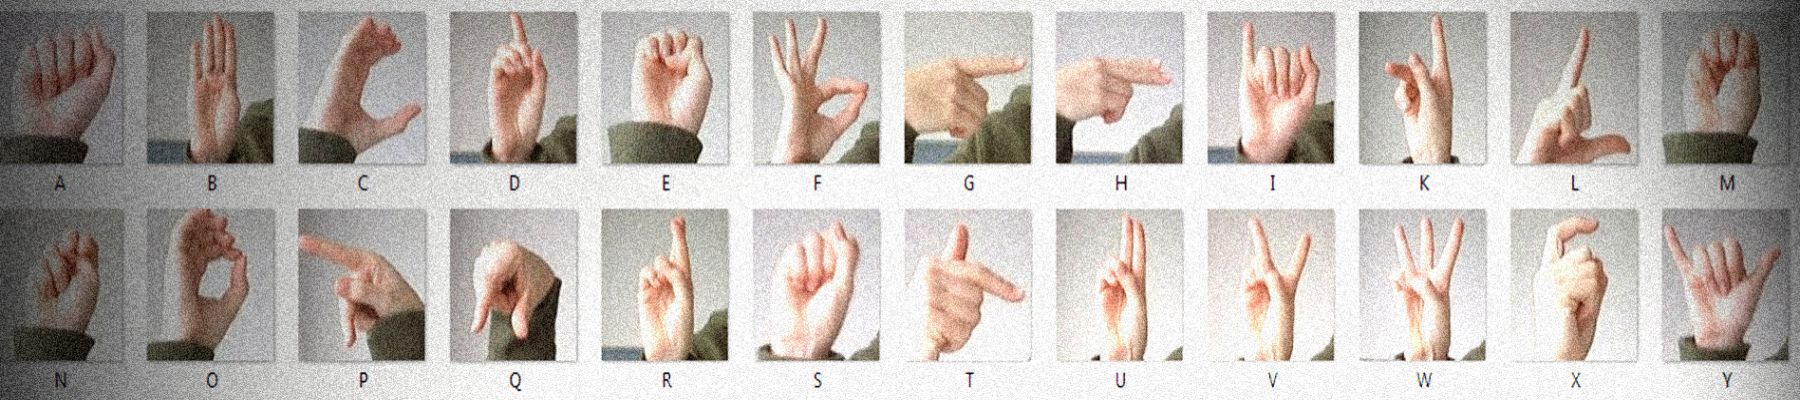

In [1]:
from IPython.display import Image
Image("dataset-cover.png")


# About the data

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabet letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds.

## Objectives in this project:
 -  View the data as an image
 -  Train different classifiers
 -  Compare performance for different classifiers using various metrics


In [2]:
## load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#splitting dataset into train and test

In [3]:
data=pd.read_csv("sign_mnist_train.csv")

In [5]:
df=pd.DataFrame(data)

In [6]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
df.shape


(27455, 785)

## we have 27455 cases, 785 features and 24 labels

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

train.shape

(21964, 785)

In [8]:
test.shape

(5491, 785)

In [8]:
labels = train['label'].values

# here we see that 9 is missing and so is 25 ( which correspond to the alphabets J and Z)

In [9]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [11]:
#to see if data is constant

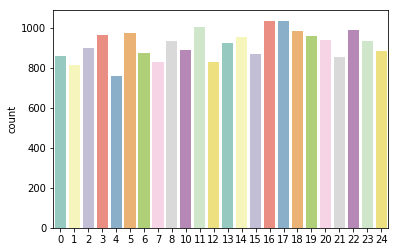

In [10]:
plt.figure()
sns.countplot(x =labels,palette="Set3")

# we see the data is almost uniform

In [11]:
train.drop('label', axis = 1, inplace = True)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [15]:
print (images)

[[126 129 132 ... 211 210 210]
 [140 145 149 ... 159 145  94]
 [121 128 136 ...  36  25   0]
 ...
 [145 146 147 ... 175 175 174]
 [146 148 149 ... 169 168 167]
 [169 171 172 ... 186 185 183]]


In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels1 = label_binrizer.fit_transform(labels)

# A Demonstration of LABEL BINARIZER

Several regression and binary classification algorithms are available in scikit-learn. A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.

At learning time, this simply consists in learning one regressor or binary classifier per class. In doing so, one needs to convert multi-class labels to binary labels (belong or does not belong to the class). LabelBinarizer makes this process easy with the transform method.

At prediction time, one assigns the class for which the corresponding model gave the greatest confidence. LabelBinarizer makes this easy with the inverse_transform method.

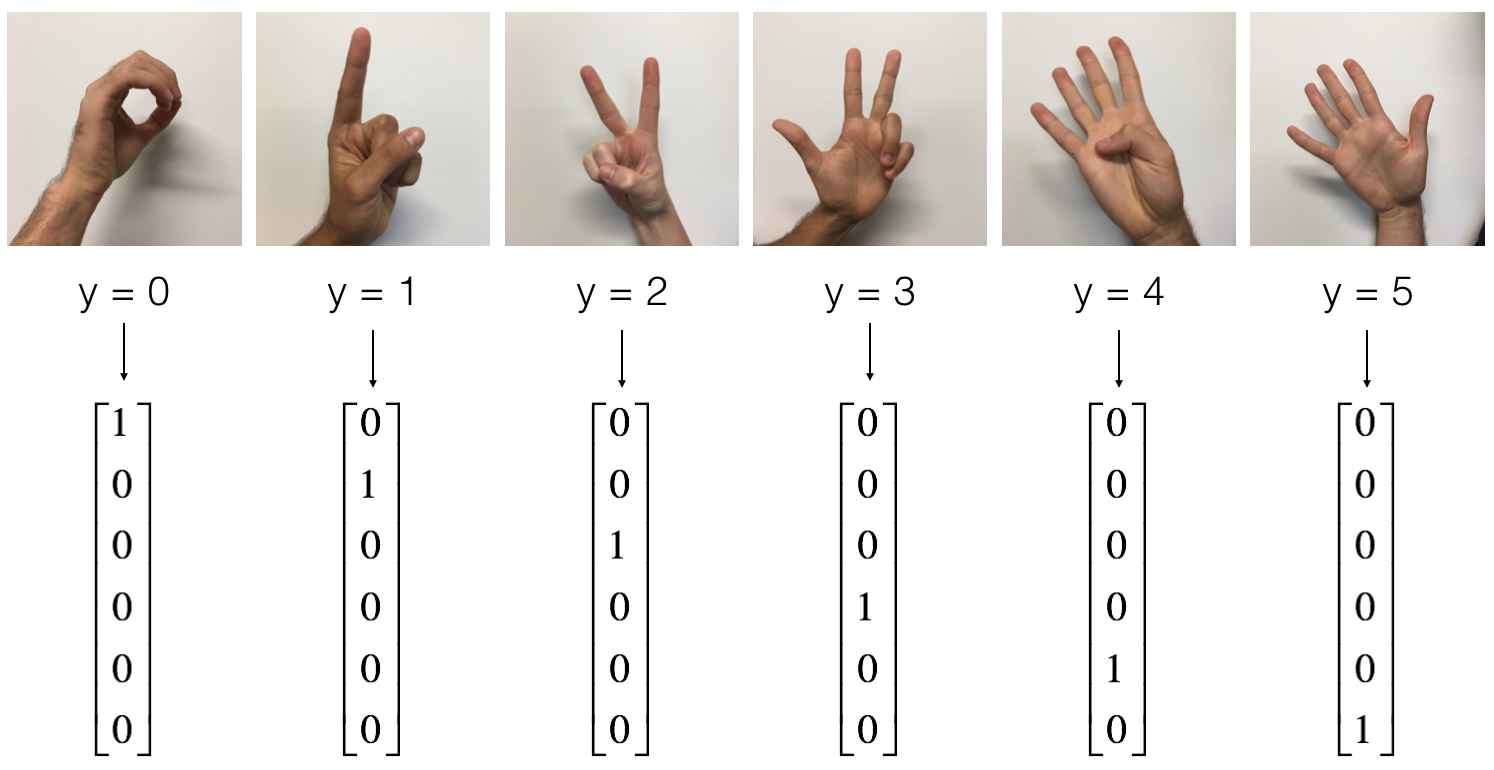

In [14]:
Image("signs.png")

In [17]:
labels1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

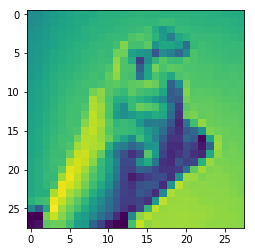

In [15]:
plt.imshow(images[1].reshape(28,28))

In [19]:
print (labels1[1])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels1, test_size = 0.3, random_state = 0)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


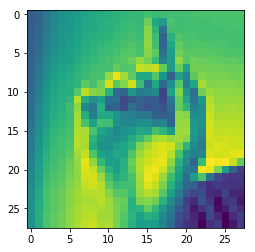

In [17]:
plt.imshow(x_test[0].reshape(28,28))
print (y_test[0])

# DECISION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.0
Accuracy of Decision Tree classifier on test set: 0.8476479514415781


# KNN CLASSIFICATION

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 

In [20]:
 knn.fit(x_train,y_train) 
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [21]:
knn_predictions = knn.predict(x_test)  

In [22]:
from sklearn import metrics as m
m.accuracy_score(y_test,knn_predictions)

0.9823975720789074

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2,random_state=0)

In [24]:
labels

array([18, 23,  6, ..., 18,  2, 18], dtype=int64)

# NAIVE BAYES

In [25]:
from sklearn.naive_bayes import MultinomialNB
classification = MultinomialNB()
classification.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
y_pred1=classification.predict(x_test)

In [27]:

from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_test,y_pred1))

[[118   0   0   0   6   0   0   0   0  18   0   2   5   0   0   0   0  26
    0   0   0   0   0   0]
 [  0 134   0   0   2   1   0   0   7  23   0   4   0   0   5   0   0   0
    0   0   0   0   0   0]
 [  0   0 154   0   0   7   1   2   0   0   1   0   0  34   0   2   0   0
    0   0   0   0   0   0]
 [  0   7   0  87  12   6   0   0   0  24   0   0   0   0   3   1   0   1
    7   6   2   3  37   0]
 [  1  11   0   0 110   0   0   0   0   0   0   7   3   6   0   0   0  17
    1   0   0   0   0   0]
 [  0   0   8   0   0 116  11   0   0  18   3   0   0  12   0   0   4   0
   12   0   3  10   0   0]
 [  0   0   1   3   0   0 105  19   0   0   0   0   0   1   0   0   0   0
   29   2   0   0   2   0]
 [  0   0   0   0   0   0  19  85   1   5   0   0   0   0   2   0   0   0
   29   0   3   1   3   0]
 [  2   0   0   0   1   8   2   0 104   4   0   1   0   2  23   0   0  22
    1   0   5   6   0  20]
 [  0   0   0   6   0   2   0   0   9 119   0   0   0   0   0   0   8   0
    6  18  11   0

In [29]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       175
           1       0.75      0.76      0.76       176
           2       0.86      0.77      0.81       201
           3       0.60      0.44      0.51       196
           4       0.64      0.71      0.67       156
           5       0.69      0.59      0.64       197
           6       0.67      0.65      0.66       162
           7       0.61      0.57      0.59       148
           8       0.57      0.52      0.54       201
          10       0.35      0.66      0.46       180
          11       0.77      0.63      0.69       184
          12       0.46      0.25      0.32       158
          13       0.65      0.36      0.46       172
          14       0.61      0.66      0.64       175
          15       0.39      0.70      0.50       174
          16       0.86      0.58      0.70       221
          17       0.40      0.21      0.28       189
          18       0.26    

In [30]:
m.accuracy_score(y_test,y_pred1)

0.5385841110858184

# GAUSSIAN NB

In [31]:
from sklearn.naive_bayes import GaussianNB
classification = GaussianNB()
classification.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
y_pred = classification.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 81   0   0   0  17   0   0   0  12   6   0   9   3   7  13   6   0  21
    0   0   0   0   0   0]
 [  0  84   0   1  12   7   0   0  15  17   0   1   3   0  14   2   9   6
    1   2   0   2   0   0]
 [  0   0 150   0   1   2   0   0   0   3   2   0   1  14   6  10   0   0
   12   0   0   0   0   0]
 [  0   2   0  75  14   3   0   0  18  18   0   0   3   0  13   8  20   9
    3   3   2   0   3   2]
 [  7   2   0   0 103   0   0   0   1   0   0   6   5   6   7   6   0   8
    4   0   0   1   0   0]
 [  1   1   6   1   3  69  14   0   2  11   6   0   1   9  13   6  12   0
   35   0   2   1   4   0]
 [  0   0   0   0   0   5  99  10   4   0   0   0   1   3   3   5   2   0
   29   0   0   0   1   0]
 [  0   0   0   1   0   0  13  76   2   8   0   0   0   2   8   7   0   0
   25   0   5   0   0   1]
 [  6   0   0   0   1   5   1   0 118   5   0   0   2   5   8   3   5  17
    3   0   2   8   7   5]
 [  0   0   0   0   0   2   0   0   3  83   0   0   0   0  24   0  39   2
    5   1   8   6

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       175
           1       0.92      0.48      0.63       176
           2       0.94      0.75      0.83       201
           3       0.65      0.38      0.48       196
           4       0.50      0.66      0.57       156
           5       0.51      0.35      0.41       197
           6       0.72      0.61      0.66       162
           7       0.66      0.51      0.58       148
           8       0.40      0.59      0.48       201
          10       0.28      0.46      0.35       180
          11       0.66      0.54      0.59       184
          12       0.41      0.37      0.39       158
          13       0.44      0.26      0.32       172
          14       0.54      0.66      0.59       175
          15       0.29      0.66      0.41       174
          16       0.48      0.53      0.50       221
          17       0.21      0.42      0.28       189
          18       0.31    

In [35]:
m.accuracy_score(y_test,y_pred)

0.44616435237878443

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_pred=clf.predict(x_test)

In [43]:
print("Accuracy:",m.accuracy_score(y_test, y_pred))

Accuracy: 0.9949920327794218


# accuracy
 - Accuracy of Decision Tree classifier: 0.8503793626707132
 - Accuracy of KNN classifier: 0.9807283763277693
 - Accuracy of Gaussian NB: 0.4652856817664466
 - Accuracy of Multinomial NB: 0.5422262690644206
 - Accuracy of Random forests classifier: 0.9949920327794218

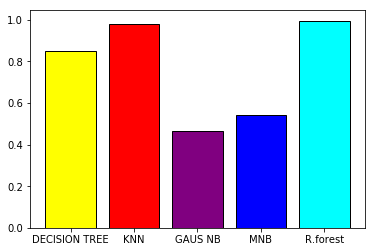

In [44]:
d=[0.8503793626707132,0.9807283763277693,0.4652856817664466,0.5422262690644206,0.9949920327794218]
bars = ('DECISION TREE', 'KNN', 'GAUS NB', 'MNB','R.forest')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, d,color=['yellow', 'red', 'purple', 'blue','cyan'], edgecolor='black')
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


# ACKNOWLEDGEMENT

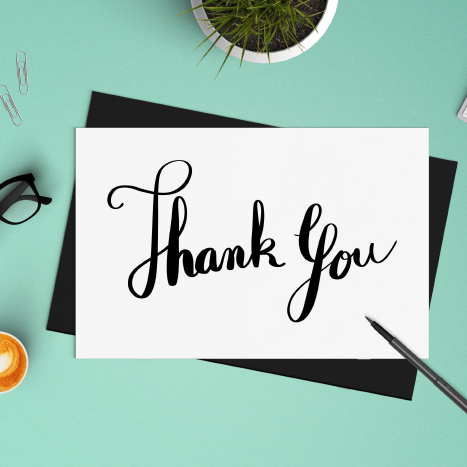

In [21]:
Image("Thank-You-Sayings-FT.jpg")

I would like to express my special thanks of gratitude to my ML teacher MR. kanav bansal who gave me the golden opportunity to do this wonderful project on the SIGNS DATASET, which also helped me in doing a lot of Research and i came to know about so many new things.